# **Final Project**
# DATA 3300

## Names: (Clay Willden, Dallin Higgins, Israel Bell, Joe Shafer)

## **Summary**

**This assignment is broken down into five parts: 170 pts**

1.   **Data Preparation & Data Understanding (40 pts)** Clay
2.   **Unsupervised DM (26 pts)** Joey
3.   **Supervised DM Technique 1 (27 pts)** Dallin
4.   **Supervised DM Technique 2 (27 pts**) Israel
5.   **Evaluation of Moedls & Business Recommendations (50 pts)** Everyone


***Each part can be started now, except Part 5. You complete Parts 3 and 4 in order to proceed with Part 5.***





## **Part 1: Data Preparation & Understanding**

### **A**
### **Data Preparation (16 pts)**

**Import the manager_performance dataset into Python, and clean/transform this data set. If you need some reminders about how to do this, revisit the data preparation module!**



*   **Think about any ethical concerns regarding this dataset. Remove any columns that personally identify employees or could be used to discriminate against employees (sex, marital status, age, sexual orientation, etc.).**
*   **Go through each attribute column and perform various data transformations necessary to cleanse the dataset. For each attribute/column, report each data cleansing step performed and the underlying assumption as to why the data cleansing action was performed.**
  *   **Do not simply state that “all columns were trimmed” or restate the cleansing action itself.**
  *   **State the assumption (e.g., “M” was changed to “Male” because it was assumed that “M” indicated “Male” in this dataset.).**
  *   **Also, if no data transformations were made, state your assumption here as well (all data were assumed to be correct/clean).**


*When you're finished performing all cleaning steps, please display a heading of your finalized df.*

**For this portion of the assignment, fill in the information below to indicate the cleaning actions taken and the assumptions you made. `Manager_ID` has already been filled in, to provide an example.**

## **Data Transformations & Assumptions Outline**

* **Manager_ID**
  * **Action**: None
  * **Assumption**: All values appear correct with no duplicates
* **First_Name**
  * **Action**: Remove any columns that personally identify employees
  * **Assumption**: people can guess first names from coworkers
* **Last_Name**
  * **Action**: Remove any columns that personally identify employees
  * **Asumption**: corrilates directly to people
* **Age**
  * **Action**: Remove any columns that personally identify employees
  * **Assumption**: should someone be old people could guess who this is
* **Time_Employed**
  * **Action**: replaced O with 0 so it is a numaral like other values
  * **Assumption**: the people made a mistake whail imputing data and put a letter instead of a number
* **Num_Prev_Positions**
  * **Action**: Had to remove the writen number "two" replace it with 2
  * **Assumption**: The person imputing data dident know what format to input the date
* **Teamwork**
  * **Action**: none taken
  * **Assumption**: all data inputed correctly
* **Motivation**
  * **Action**:none taken
  * **Assumption**: all data inputed correctly
* **Leadership**
  * **Action**: replaced a value of 100
  * **Assumption**: I think the rateing was 1-10 so the 0 might have goetten stuck
* **Performance_Evaluation**
  * **Action_1**:stripped colum of whitespace
  * **Assumption_1**: a space befor or after the word can create a row for itself.
  * **Action_2**:replaced 'highgh' to 'high'
  * **Assumption_2**: the person imputing data got distracted and hit gh again
  * **Action_3**: replaced loow to low
  * **Assumption_3**: the o key got stuck resulting on a extra.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # typical libraries for data manipulation and visualization

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree #needed for developing and evaluating decision tree model
import seaborn as sns #needed to visualize confusion matrix
import graphviz #needed to visualize decisiont tree plot --> this needs to be installed for Jupyter notebooks

import sklearn.metrics as metrics # sklearn packages needed to run cross-validation and evaluate model performance

from sklearn.linear_model import LogisticRegression # sklearn function for Logistic Regression

import warnings
warnings.filterwarnings("ignore") # prevents warning messages from being displayed (optional)

In [ ]:
# replace with code to import dataset
pd.set_option("display.max_rows", None, "display.max_columns", None)
df = pd.read_excel("/content/manager_performance.xlsx") # import an excel file
# replace with code to view the df headers
df.head()

,Manager_ID,First_Name,Last_Mame,Age,Time_Employed,Num_Prev_Positions,Teamwork,Motivation,Leadership,Performance_Evaluation
0,1,James,Butt,44,8,2,4,10,8,high
1,2,Josephine,Darakjy,49,4,3,8,7,8,high
2,3,Art,Venere,70,3,3,1,7,5,low
3,4,Lenna,Paprocki,34,9,1,4,4,5,low
4,5,Donette,Foller,39,7,3,3,2,10,low


In [ ]:
# create new code cells as necessary. Remove columns based on instructions above; perform other data cleaning steps as necessary.
df = df.drop(columns = ['First_Name', 'Last_Mame', 'Age'])
df.head()
# you might consider using a different code cell for each variable/column you make any changes to

,Manager_ID,Time_Employed,Num_Prev_Positions,Teamwork,Motivation,Leadership,Performance_Evaluation
0,1,8,2,4,10,8,high
1,2,4,3,8,7,8,high
2,3,3,3,1,7,5,low
3,4,9,1,4,4,5,low
4,5,7,3,3,2,10,low


In [ ]:
df = df.replace('O', 0)
df['Time_Employed'].value_counts()

Time_Employed
8     75
5     74
10    71
12    67
0     67
1     66
13    66
2     63
15    63
6     62
7     61
11    61
9     60
3     60
4     54
14    53
17     1
18     1
Name: count, dtype: int64

In [ ]:
df = df.replace('two', 2)
df['Num_Prev_Positions'].value_counts()

Num_Prev_Positions
0    262
3    261
1    260
2    242
Name: count, dtype: int64

In [ ]:
df['Teamwork'].value_counts()

Teamwork
5     115
1     112
2     112
6     111
4     105
3      99
8      97
10     92
9      91
7      91
Name: count, dtype: int64

In [ ]:
df['Motivation'].value_counts()

Motivation
7     119
1     116
3     105
4     104
6     104
8     103
2     101
10     92
5      92
9      89
Name: count, dtype: int64

In [ ]:
df = df.replace(100, 10)
df['Leadership'].value_counts()

Leadership
2     116
3     113
6     106
1     105
9     102
10     99
7      99
4      98
5      94
8      93
Name: count, dtype: int64

In [ ]:
df = df.replace('highgh', 'high')
df = df.replace('loow', 'low')
df['Performance_Evaluation'] = df['Performance_Evaluation'].str.strip()
df['Performance_Evaluation'].value_counts()

Performance_Evaluation
low     701
high    324
Name: count, dtype: int64

In [ ]:
# replace with code to display finalized clean dataset
df

,Manager_ID,Time_Employed,Num_Prev_Positions,Teamwork,Motivation,Leadership,Performance_Evaluation
0,1,8,2,4,10,8,high
1,2,4,3,8,7,8,high
2,3,3,3,1,7,5,low
3,4,9,1,4,4,5,low
4,5,7,3,3,2,10,low
5,6,1,2,9,1,9,low
6,7,11,2,6,9,10,high
7,8,6,3,3,8,6,high
8,9,12,2,2,3,4,low
9,10,6,3,10,9,7,high


### **B**
### **Data Understanding (24 pts):**

**Return to Canvas and download the `manager_performance_clean.csv`. This file is provided so that any errors potentially made during data cleansing do not result in subsequent errors/deductions for the remaining portions of the assignment. Thoroughly explore the data. Specifically:**

**Look through this data set and, ignoring the ID, identify the types of data variables therein (nominal, ordinal, ratio, or interval).**

* **Time Employed:** ratio
* **Num Prev Positions:** ratio
* **Teamwork:** ordinal
* **Motivation:** ordinal
* **Leadership:** ordinal
* **Performance Evaluation:** nominal

**Produce a descriptive statistics table that excludes `Manager_ID` and groups by performance evaluation (i.e., high vs low). (*Hint: will need to use the groupby() and describe() functions*). Display below:**

In [ ]:
# replace with code to read in the manager_performance_clean.csv file

df = pd.read_csv("/content/manager_performance_clean.csv")  # import a csv file

# replace with code to view headers

df.head()

,Manager_ID,Time_Employed,Num_Prev_Positions,Teamwork,Motivation,Leadership,Performance_Evaluation
0,1,8,2,4,10,8,high
1,2,4,3,8,7,8,high
2,3,3,3,1,7,5,low
3,4,9,1,4,4,5,low
4,5,7,3,3,2,10,low


In [ ]:
# replace with code to drop the primary key

df = df.drop(columns = ['Manager_ID']) # drop a column

# groupby performance_evaluation and produce descriptive statistics on all other variables

df.groupby('Performance_Evaluation').describe().stack(0)


25%  50%   75%  count   max  \
Performance_Evaluation                                                   
high                   Leadership          5.0  7.0   9.0  324.0  10.0   
                       Motivation          6.0  7.0   9.0  324.0  10.0   
                       Num_Prev_Positions  1.0  2.0   3.0  324.0   3.0   
                       Teamwork            5.0  7.0   9.0  324.0  10.0   
                       Time_Employed       6.0  9.0  12.0  324.0  18.0   
low                    Leadership          2.0  4.0   7.0  701.0  10.0   
                       Motivation          2.0  4.0   7.0  701.0  10.0   
                       Num_Prev_Positions  0.0  1.0   2.0  701.0   3.0   
                       Teamwork            2.0  4.0   7.0  701.0  10.0   
                       Time_Employed       3.0  6.0  11.0  701.0  17.0   

                                               mean  min       std  
Performance_Evaluation                                              
high                   Leadership          6.734568  1.0  2.635300  
                       Motivation          6.990741  1.0  2.346839  
                       Num_Prev_Positions  1.962963  0.0  0.940252  
                       Teamwork            6.820988  1.0  2.550795  
                       Time_Employed       8.959877  0.0  4.128163  
low                    Leadership          4.760342  1.0  2.793292  
                       Motivation          4.630528  1.0  2.767492  
                       Num_Prev_Positions  1.271041  0.0  1.140490  
                       Teamwork            4.616262  1.0  2.706018  
                       Time_Employed       6.788873  0.0  4.642775

**From this, create at least two hypotheses regarding factors driving employee performance evaluations. These hypotheses should not be simple restatements of the facts shown in the table, but instead should reflect your thoughts about the potential underlying causes of these results (i.e., what might be causing the results seen in the table?). Explain any rationale behind your hypotheses as needed to clarify your line of thinking.**

The mean value for team work for the lower evalutions was 4.6 compared to the high evaluations at 6.82. There was a significant difference in the emna value for this metric. This can be a leading difference maker in wheter an employee will recieve a low or high evalution. People who are harder to work with make the work process more challenging in all areas of the workspace from communication, collaboration, and general team chemistry.

Another large difference was the motivation value which was 4.63 for the lower evaluations and 6.99 for the higher evaluations. Less motivated indivizuals may have a lack of drive to do their tasks, take initiatives, and attempt to contiously improve.

**Develop a data visualization that distinguishes between high-and low-performers in the dataset. Include a brief caption describing the figure.**

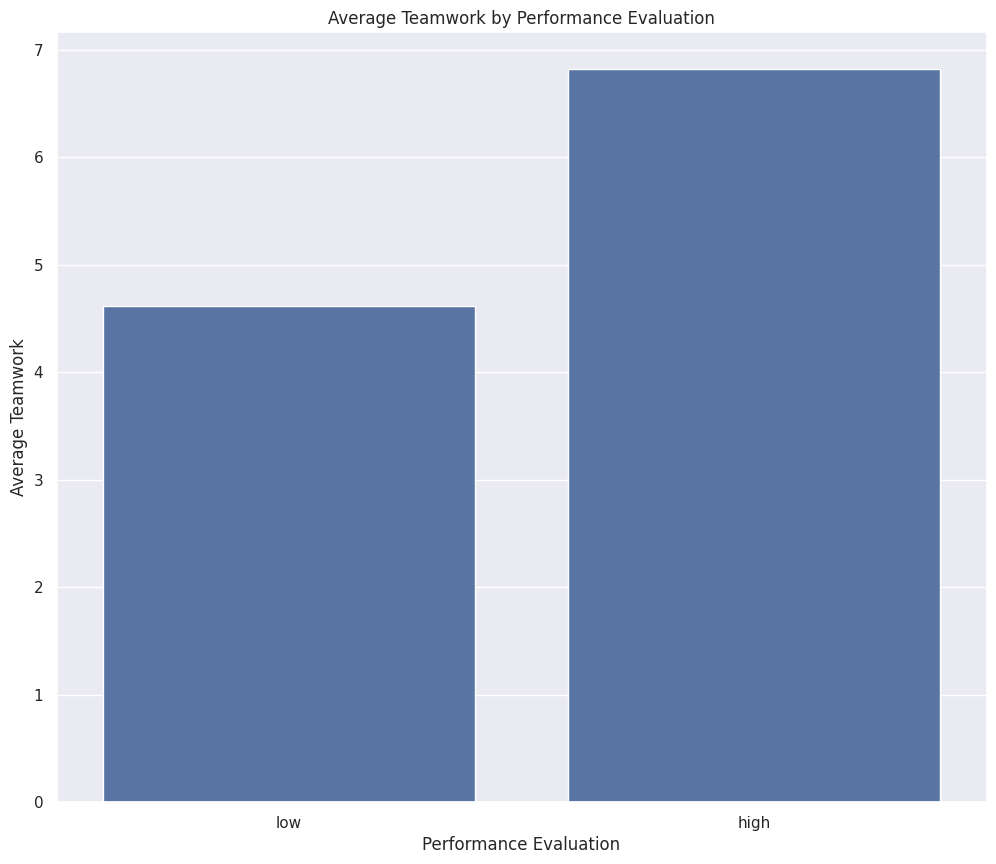

In [ ]:
# replace with code to produce viz -- see Module 3 cheat sheet or ICE for code on producing visualizations

df = pd.read_csv("/content/manager_performance_clean.csv")  # import a csv file


df['Performance_Evaluation'] = pd.Categorical(df['Performance_Evaluation'], categories=['low', 'high'])

mean_motivation = df.groupby('Performance_Evaluation')['Teamwork'].mean().reset_index()

sns.barplot(x='Performance_Evaluation', y='Teamwork', data=mean_motivation, order=['low', 'high'])
plt.xlabel("Performance Evaluation")
plt.ylabel("Average Teamwork")
plt.title("Average Teamwork by Performance Evaluation")
plt.show()



```
# This is formatted as code
```

Caption: Used teamwork for my y-value because it was a variable that had clear distinction between the lower and higher evaluations. This may be indictive of a high performance evaluation.

**Develop a correlation matrix that includes all candidate independent variables, then display the correlation matrix in a color-mapped table. Assume all variables are normally distributed and DO NOT require transformations.**

In [ ]:
# replace with code to drop the primary key and DV

df = df.drop(columns = ['Manager_ID', 'Performance_Evaluation']) # drop a column
# replace with code to produce correlation matrix, and display in a color-mapped table

cor_matrix = df.corr() #run correlation matrix
cor_matrix.style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1) #produce correlation matrix table with colormap

,Time_Employed,Num_Prev_Positions,Teamwork,Motivation,Leadership
Time_Employed,1.000000,0.067914,-0.023985,0.045286,-0.024617
Num_Prev_Positions,0.067914,1.000000,-0.017398,0.018155,-0.026634
Teamwork,-0.023985,-0.017398,1.000000,0.005770,-0.007870
Motivation,0.045286,0.018155,0.005770,1.000000,-0.028966
Leadership,-0.024617,-0.026634,-0.007870,-0.028966,1.000000


**Are there any variable pairs that are multicollinear based on a correlation coefficient value cut-off of 0.6? Explain your answer.**

*None* of the variables appear to be multicollinear based off this value.

# **Part 2: Unsupervised DM (26 pts)**

**Download the `manager_performance_clean.csv` dataset from Canvas. This file is provided so that any errors potentially made during data cleansing do not result in subsequent errors/deductions for the remaining portions of the assignment.**

**Import the clean dataset to Python (or use the clean file imported in 1B above), and name your df something different for Part 2! Conduct an unsupervised data mining technique appropriate for this dataset. Think about the data variable types in this dataset and the business question, *then choose from association rules analysis or clustering analysis*.**

> ***HINT: Revisit the ‘summary slide’ for each of the unsupervised data mining techniques to remember what type(s) of data variables can be input into these models.***

---

**Choose an appropriate and informative unsupervised data mining model. Think about what we're interested in figuring out with this manager performance dataset (performance evaluation) and how many classes we have for this variable. Change one parameter in your unsupervised analysis, based on this. (Hint: the number of classes determined above will be used to change this parameter, instead of using some of the other methods we discussed in class.)**

### **A**

**Identify which model was selected and why. The why should focus on the types of data variables in the manager performance dataset. Also discuss any parameters changed in the model and why.**

We have selected clustering analysis. We have selected clustering analysis because we have both qualitative and quantitative data and the association and statistical correlation types of models are only able to account for either qualitative or quantitative, not both. This dataset has interval as well as binominal data, so a clustering analysis is the only one that makes sense.

### **B**

**Perform the unsupervised DM technqiue using your selected model and parameters. Make sure to take any necessary preprocessing steps to ensure the data are in the proper form before running the model (hint: step taken to ensure no variables are over-weighted due to having different units).**

> **After running your analysis, include any relevant results and interpret what they mean. Revisit the previous exercises for the chosen model to remember what the relevant results and interpretations should focus on.**

***Make sure to add dummy codes for high and low performers before running any preprocessing steps. This is done with the `pd.get_dummies()`, which we implemented in other modules. `drop_first` should be set to `true`. It's important to dummy code this categorical variable first, otherwise the next preprocessing step you take will result in an error.***

In [ ]:
# replace with code to import required libraries and packages to perform unsupervised technique -- see that module's cheat sheet or ICE assignment
!pip install kneed
import matplotlib.pyplot as plt  #needed to create data visualizations
import pandas as pd #needed to import data and manipulate dataframe
import numpy as np #needed to manipulate variables
from kneed import KneeLocator #needed to find knee in knee plot
import sklearn.cluster #needed to fit clustering models
from sklearn.cluster import KMeans #needed to use Kmeans clustering
from sklearn.metrics import silhouette_score #needed to generate metrics from kmeans
from sklearn.preprocessing import StandardScaler #needed to standardize features

In [ ]:
df = pd.read_csv("/content/manager_performance_clean.csv")

In [ ]:
# replace with code to dummy code categorical variables (rename df)
df = pd.get_dummies(data = df, drop_first = True)

In [ ]:
#replace with code to create an object called features that drops the ID
features = df.drop(['Manager_ID'], axis = 1)
#replace with code to preview features
features.head()

,Time_Employed,Num_Prev_Positions,Teamwork,Motivation,Leadership,Performance_Evaluation_low
0,8,2,4,10,8,False
1,4,3,8,7,8,False
2,3,3,1,7,5,True
3,9,1,4,4,5,True
4,7,3,3,2,10,True


In [ ]:
#replace with code to standardize and normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features

array([[ 0.11423933,  0.45270002, -0.46134637,  1.61749055,  0.90465129,
        -1.47091137],
       [-0.75635779,  1.3399228 ,  0.94394347,  0.56794773,  0.90465129,
        -1.47091137],
       [-0.97400706,  1.3399228 , -1.51531375,  0.56794773, -0.13294763,
         0.67985062],
       ...,
       [-1.19165634, -1.32174555, -0.46134637,  0.21810012, -0.82468025,
         0.67985062],
       [ 0.54953789,  0.45270002, -0.11002391,  0.91779534,  1.59638391,
        -1.47091137],
       [-0.32105923,  1.3399228 , -0.46134637,  0.56794773,  0.21291867,
         0.67985062]])

In [ ]:
# replace with code to set model parameters
kmeans = KMeans(
    init="random",
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=42
    )
# replace with code to fit model to data
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=2, n_init=10, random_state=42)

In [ ]:
# replace with code to create table of relevant results, save to object called 'centroid_table'
centroids = kmeans.cluster_centers_ # replace with code to save cluster centroids to an object called 'centroids'
centroid_table = pd.DataFrame(centroids,
                              columns = ["Time_Employed", "Num_Prev_Positions", "Teamwork",
                                         "Motivation", "Leadership", "Performance_Evaluation"
                                                          ], #lists column names
                              index =['Cluster_0', 'Cluster_1']) #indexes clusters

centroid_table

,Time_Employed,Num_Prev_Positions,Teamwork,Motivation,Leadership,Performance_Evaluation
Cluster_0,-0.149362,-0.194049,-0.24484,-0.261006,-0.215837,0.679851
Cluster_1,0.323156,0.419840,0.52973,0.564708,0.466981,-1.470911


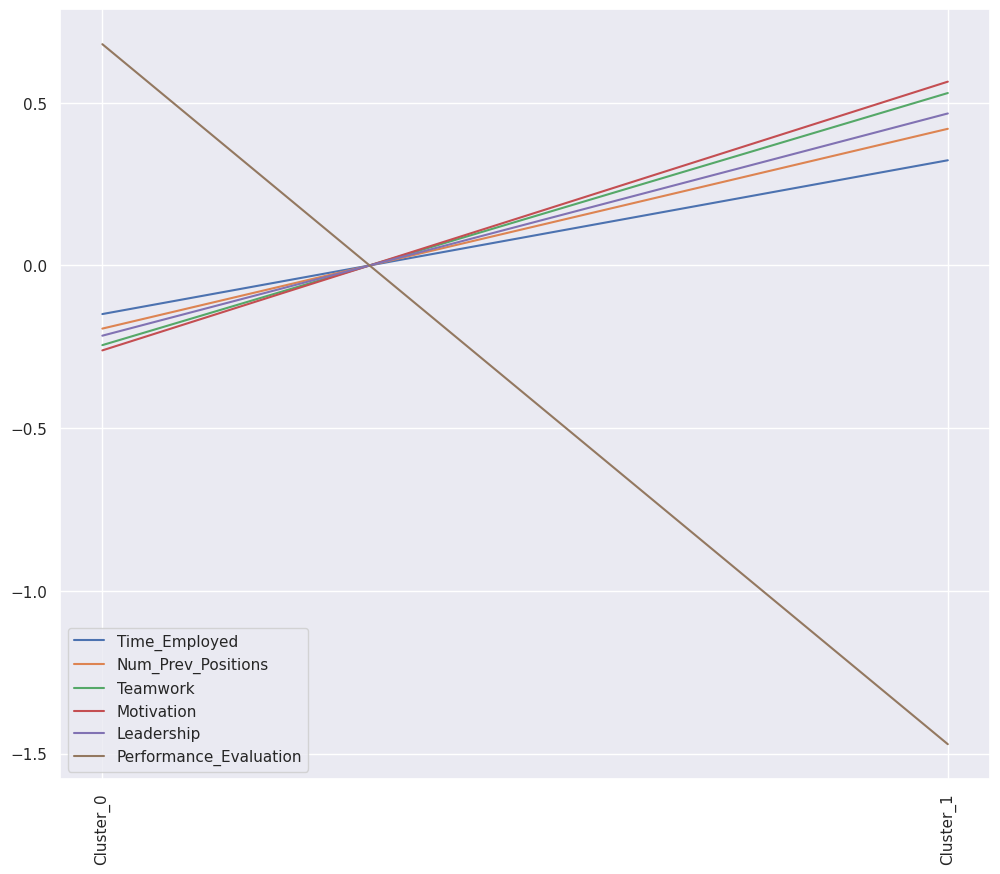

In [ ]:
 # I've provided this code to indicate how to produce a centroid plot -- since it requires some additional steps from what was done in the ICE
 ax = centroid_table.plot()
 ax.set_xticks(range(0,len(centroid_table))) # this sets the number of ticks on the x-axis to your number of clusters
 ax.set_xticklabels(centroid_table.index.values, rotation=90) # this sets your tick labels on the x-axis to your cluster labels
 plt.show()

**Results interpretation for ALL results generated in 2B**:
 First, we dropped the ID variable and dummy coded the performance evalutation variable in order to quantify all entries. Then, we fit the data into a cluster model with two clusters (high or low) to contrast the results to the performance evaluation column. Cluster 1 represents when performance evaluation is high, and Cluster 2 represents when performance evaluation is low. Our results found that when performance evaluation is high, time_employed, num_prev_positions, teamwork, motivation, and leadership are all relatively higher than when the performance evaluation is low.

### **C**

**Create at least one visualization with a caption or description about how this visualization contributes towards a *meaningful* interpretation of the manager performance data. Refer to the data visualization (module 3) ICE or cheat sheet for code on how to produce relevant visualizations, then label it and provide a brief caption.**

**You may choose to focus on only one or two variables, it does not need to include all variables. Imagine you're presenting this analysis to your supervisor or another stakeholder. Create a visualization you would use to illustrate a trend you noted in the Part 2 analysis.**

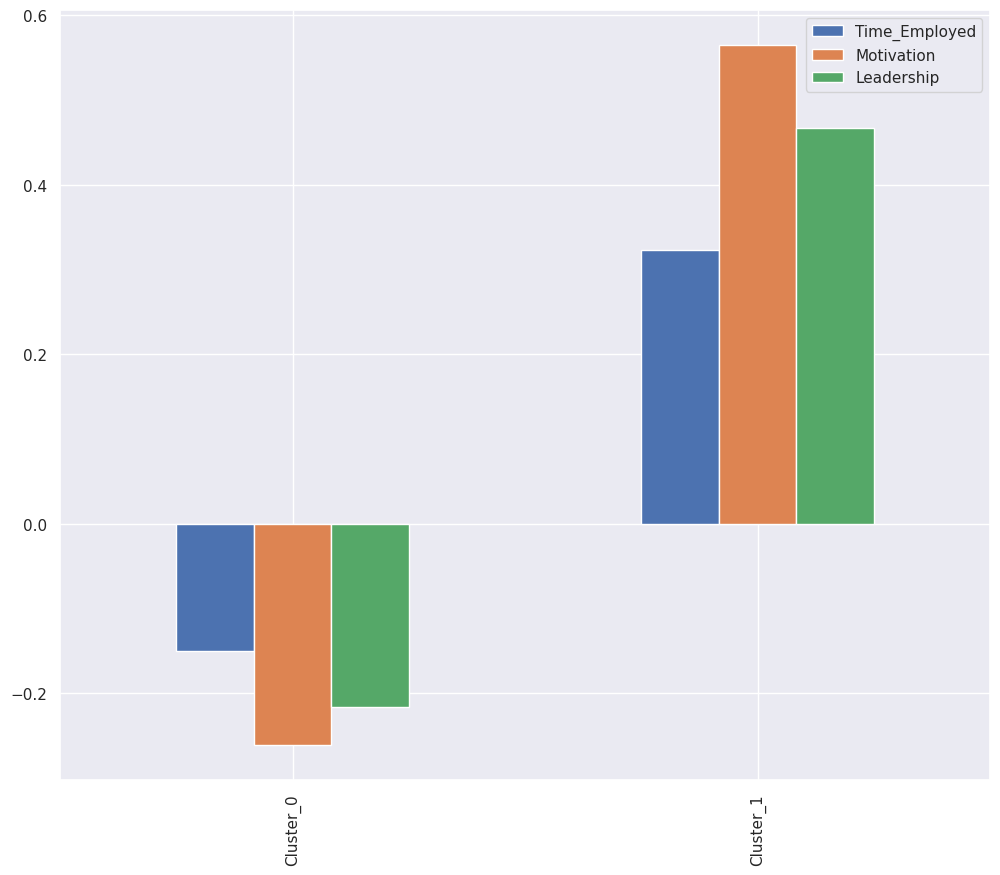

In [ ]:
# replace with code to produce viz -- see Module 3 cheat sheet or ICE for code on producing visualizations
centroid_table.plot(kind = 'bar', y = ['Time_Employed', 'Motivation', 'Leadership']) #select which variables from clustering analysis to evaluate to show average value for each cluster
plt.show()

Caption: We can see that time_employed, motivation, and leadership are all positively correlated to a high performance evaluation.

# **Part 3: Superviesd DM Technque 1 (27 pts)**

**Using the `manager_performance_clean.csv` file from Canvas, develop a supervised data mining model in Python. You will compare this chosen supervised DM model to a different supervised DM model later on in the assignment (Part 5). Think about the dependent variable and its data type in this dataset, then for Part 3 of the final project *choose between linear regression or decision tree analysis.* Referring to the summary pages for each of these methods from the lecture slides would be useful here.**

## A

**First, identify which model (between linear regression and decision trees) you have chosen and *why*. Focus on the data variable types and the dependent variable in the manager performance dataset. HINT: Think about different types of supervised models we've learned about - regression vs classification.**


Decision Trees are great for this project because they're easy to understand and can handle different types of data. They show which factors are important for picking a manager and can work well even with missing information or lots of data. It will be able to show which ones are most likely for the performance evaluation variable.

## B

**Train and evaluate your model using 10-fold cross-validation and provide any relevant plots and results. Interpret these results based on the positive class being `Performance_Evaluation_low`. DO NOT EVALUATE YOUR MODEL ON THE TEST SET UNTIL PART 5.**

> **Use a 80-20 training and test-set split, then perform 10-fold cross validation on the training set. For this model, set `min_samples_leaf` to 4, `max_depth` to 6, and `criterion` to "log_loss". Do not set the min_impurity_decrease parameter (don't include this code). Evaluate the cross-validated accuracy, precision, recall, and f-measure; then generate a confusion matrix to compare the actual classes of the DV from the training set (e.g., y_train), against the predicted classes (y_pred).**

> **When performing the `train_test_split`, set your `test_size = 0.2`, `random_state` to 100. Show the tree diagram/plot before running cross-validation.**

>**When performing cross-validation, set your `random_state` to 1. Failing to complete this step may result in your group members having different training and test sets and different cross-validation results!!!**

**Interpret the results; do not just restate the results. Tell me what these results *mean*. Revisit the previous exercises and cheat sheets for the chosen model and model performance module to remember what the relevant steps are and what the interpretation should focus on.**

In [ ]:
# replace with code to import required libraries and packges to perform supervised technique -- refer to relevant module ICE and cheat sheet


In [ ]:
df_3 = pd.read_csv('/content/manager_performance_clean.csv')
df_3.head()

,Manager_ID,Time_Employed,Num_Prev_Positions,Teamwork,Motivation,Leadership,Performance_Evaluation
0,1,8,2,4,10,8,high
1,2,4,3,8,7,8,high
2,3,3,3,1,7,5,low
3,4,9,1,4,4,5,low
4,5,7,3,3,2,10,low


In [ ]:
# replace with code to create x and y objects
x = df_3.drop(['Manager_ID', 'Performance_Evaluation'], axis=1) # assigns IVs to object 'x'
y = df_3['Performance_Evaluation']

In [ ]:
# replace with code to perform training-test split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state = 100)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(820, 5)
(205, 5)
(820,)
(205,)


In [ ]:
# replace with code to specify model and set parameters
model_1 = DecisionTreeClassifier(criterion = "log_loss", random_state=100, max_depth=6, min_samples_leaf=4)

model_1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=6, min_samples_leaf=4,
                       random_state=100)

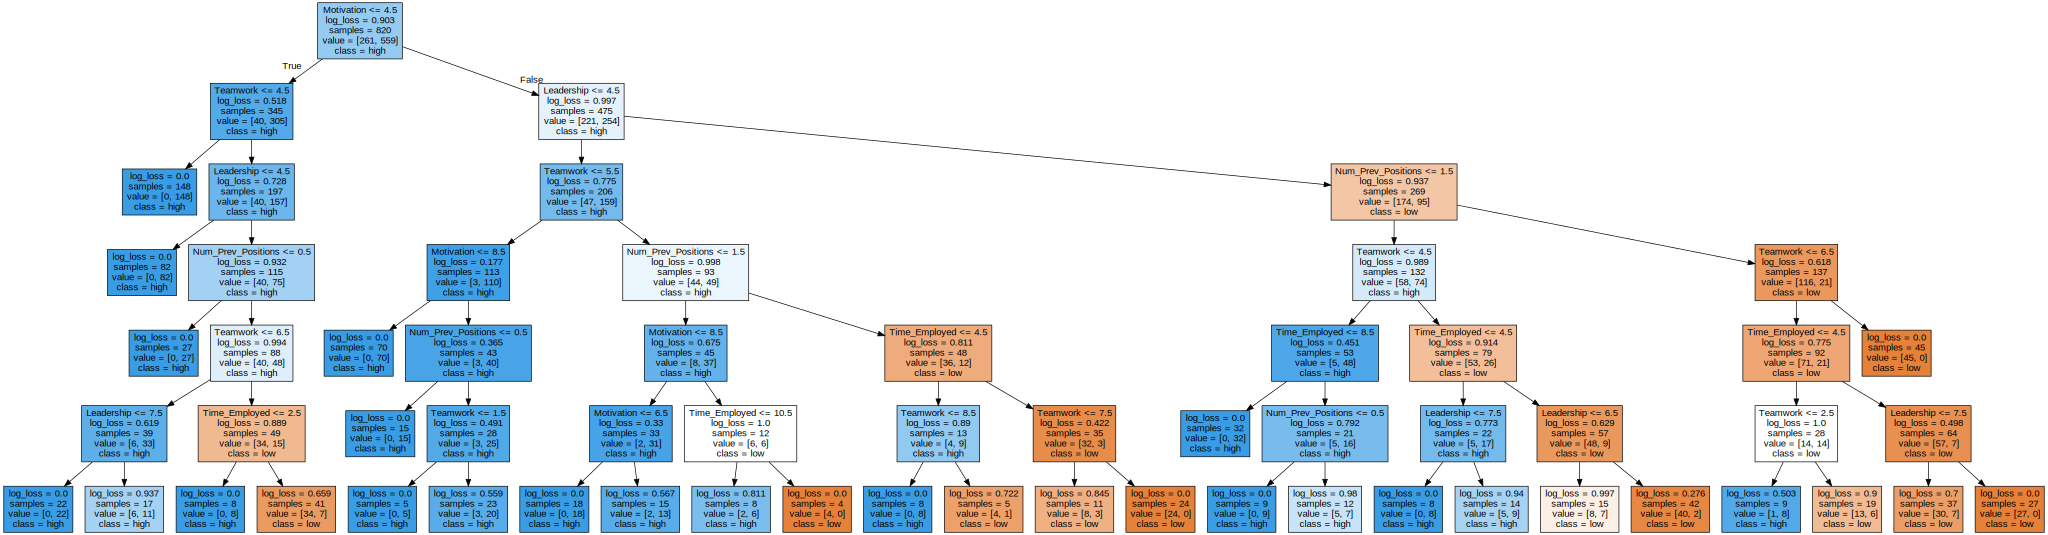

In [ ]:
# replace with code to produce tree plot on training data
labels = y.value_counts()
dot_data = tree.export_graphviz(model_1, out_file=None,
                                feature_names=x.columns,
                                class_names=labels.index.values,
                                filled=True)

# Draws graph
graph = graphviz.Source(dot_data, format="png")
graph

In [ ]:
# replace with code to specify cross-validatin parameters -- see model performance cheat sheet for these next few steps
cv = KFold(n_splits = 10, random_state = 1, shuffle = True)

In [ ]:
# replace with code to make cross-validated predictions
y_pred = cross_val_predict(model_1, x_train, y_train, cv = cv)

x_train['predicted_class'] = y_pred # add predictions to x_train dataframe
x_train['actual_class'] = y_train # add actual classes to x_train dataframe

In [ ]:
# replace with code to print the classification report
print(classification_report(y_pred, y_train)) # produces overall accuracy, precision, recall and f1

metrics.cohen_kappa_score(y_pred, y_train)

              precision    recall  f1-score   support

        high       0.87      0.80      0.83       285
         low       0.90      0.94      0.92       535

    accuracy                           0.89       820
   macro avg       0.88      0.87      0.87       820
weighted avg       0.89      0.89      0.89       820



0.7476501087138318

In [ ]:
# replace with code to produce value counts of the DV
df_3['Performance_Evaluation'].value_counts()

Performance_Evaluation
low     701
high    324
Name: count, dtype: int64

In [ ]:
# replace with code to calculate the baseline accuracy
Lift = .89/.50 # replace with model precision and baseline accuracy values to calculate lift

print(Lift)

1.78


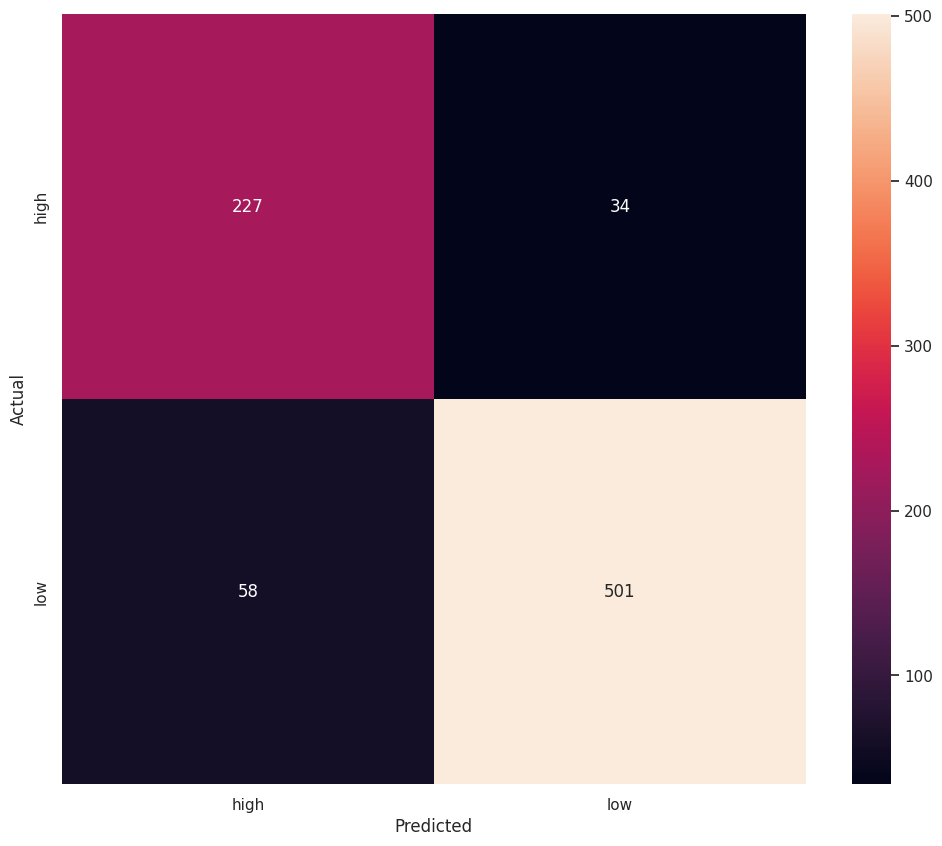

In [ ]:
# replace with code to produce confusion matrix
conf = pd.DataFrame(x_train, columns=['actual_class','predicted_class'])
confusion_matrix1 = pd.crosstab(conf['actual_class'], conf['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix1, annot=True, fmt='g')
sns.set(rc={'figure.figsize':(12,10)})
plt.show()


**Results interpretation for ALL results generated in 3B:**

Accuracy: .89, with a lift of 1.78. The confusion matrix shows a high positive actual score which shows that it is a much better model than just a naive guess. It is proven to be a useful model to compare against other models and come up with a firm interpretation.

## **C**

**Create at least one visualization with a caption or description about how this visualization contributes towards a *meaningful* interpretation of the manager performance data. Draw from the visualization portion of this course, and create your own relevant visualization, label it, and include a brief caption.**

**You may choose to focus on only one or two variables (i.e., it does not need to include all IVs). Imagine you're presenting this analysis to your supervisor or another stakeholder. Create a visualization you would use to illustrate a trend you noted in the Part 3 analysis.**

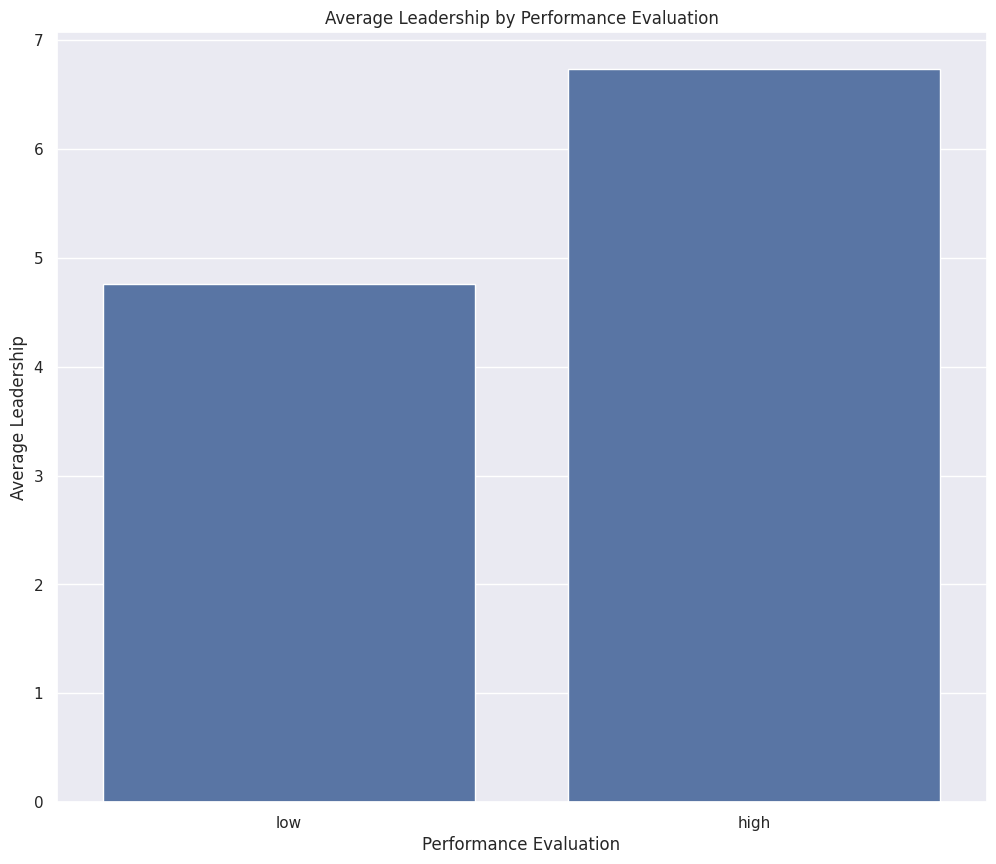

In [ ]:
# replace with code for producing viz -- see Module 3 ICE and cheat sheet for code on producing visualizations
df_3['Performance_Evaluation'] = pd.Categorical(df_3['Performance_Evaluation'], categories=['low', 'high'])

mean_leadership = df_3.groupby('Performance_Evaluation')['Leadership'].mean().reset_index()

sns.barplot(x='Performance_Evaluation', y='Leadership', data=mean_leadership, order=['low', 'high'])
plt.xlabel("Performance Evaluation")
plt.ylabel("Average Leadership")
plt.title("Average Leadership by Performance Evaluation")
plt.show()

Caption: This graph shows the correlation between leadership and performance evaluation. As we can see, there is a strong correlation between the two. Individuals who have this attribute may be considered more for the management position.

# **Part 4: Supervised DM Technique 2**

**Using the `manager_performance_clean.csv`, conduct another type of supervised data mining technique we covered in class. It cannot be decision tree or linear regression (from Part 3). But it should be a data mining technique that can be used on this dataset, so again think about the DV and its data variable type. Referring to the data mining flow chart from the supervised DM lecture might be helpful, or review the summary slides for the supervised DM technqiues covered in this class during lectures.**

## A
**First, identify which model you have chosen and why. Focus on the data variable types and the dependent variable in the manager performance dataset. HINT: Think about different types of supervised models we've learned about - regression vs classification, and don't reuse the model type used in Part 3.**

We will use logistic regression in this section to predict wheter a manager will be a potentially high or low evalutated employee. The dependent variable will be performance evaluation. The independent variables will include leadership, motivation, team work, number of previous postions, and time employeed.

## B

**Train and evaluate your model using 10-fold cross-validation and provide any relevant plots and results. Interpret these results based on the positive class being `Performance_Evaluation_low`. DO NOT EVALUATE YOUR MODEL ON THE TEST SET UNTIL PART 5.**

> **Use a 80-20 training and test-set split, then perform 10-fold cross validation on the training set. Evaluate the cross-validated accuracy, precision, recall, and f-measure; then generate a confusion matrix to compare the actual classes of the DV from the training set (e.g., y_train), against the predicted classes (y_pred).**

> **Also note that we are focused on prediction for this assignment, not interpretation. Generation of a model summary table is NOT required.**

> **When performing the `train_test_split`, set your `test_size = 0.2`, `random_state` to 100.**

> **When performing cross-validation, set your random_state to 1. Failing to complete this step may results in your group members having different training and test sets and different cross-validation results!!!**

**Do not just restate the results. Tell me what these results *mean*. Revisit the previous exercises and cheat sheets for the chosen model and model performance module to remember what the relevant steps are and what the interpretation should focus on.**

In [ ]:
# replace with code to import required libraries and packges to perform supervised technique -- refer to relevant module ICE and cheat sheet
# If you import the data set here, it's recommended to call it something different for Part 4

df_2 = pd.read_csv("/content/manager_performance_clean.csv")  # import a csv file

# replace with code to view the headers
df_2.head()

,Manager_ID,Time_Employed,Num_Prev_Positions,Teamwork,Motivation,Leadership,Performance_Evaluation
0,1,8,2,4,10,8,high
1,2,4,3,8,7,8,high
2,3,3,3,1,7,5,low
3,4,9,1,4,4,5,low
4,5,7,3,3,2,10,low


In [ ]:
# replace with code to create x and y objects -- perform any necessary preprocessing
x = df_2.drop(['Manager_ID', 'Performance_Evaluation'], axis=1) #remove primary key, the DV, and any collinear variables you may have identified
x = pd.get_dummies(data = x, drop_first = True) #dummy code any categorical IVs

y = df_2['Performance_Evaluation'] #assign DV to 'y' object
y = pd.get_dummies(data = y, drop_first = True) #dummy code the y variable so python treats it as binominal/dichotomous

In [ ]:
# replace with code to perform training-test split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=100) #set a test and training split

In [ ]:
# replace with code to specify cross-validatin parameters -- see model performance cheat sheet for these next few steps

cv = KFold(n_splits = 10, random_state = 1, shuffle = True) # replace n with 5, 10, or other value

# replace with code to specify model

model_2 = LogisticRegression()

In [ ]:
# replace with code to create scoring dictionary

scoring = {'acc': 'accuracy',
           'f1' : 'f1',
           'precision' : 'precision',
           'recall' : 'recall',
           'roc_auc' : 'roc_auc',
           'r2' : 'r2'}

In [ ]:
# replace with code to run cross-validated model and produce evaluation metric scores

scores2 = cross_validate(model_2, x_train, y_train, scoring = scoring, cv = cv, return_train_score=False)

scores2 = pd.DataFrame(scores2, columns = scores2.keys())
scores2.mean() # produces overall accuracy, f1, precision, recall, roc_auc, and r^2

fit_time          0.008787
score_time        0.043375
test_acc          0.887805
test_f1           0.916223
test_precision    0.910299
test_recall       0.923734
test_roc_auc      0.957444
test_r2                NaN
dtype: float64

In [ ]:
# replace with code to show scores output

scores2.mean() # produces overall accuracy, f1, precision, recall, roc_auc, and r^2

fit_time          0.008787
score_time        0.043375
test_acc          0.887805
test_f1           0.916223
test_precision    0.910299
test_recall       0.923734
test_roc_auc      0.957444
test_r2                NaN
dtype: float64

In [ ]:
# replace with code to calculate the baseline accuracy

Lift = 91.02/50 # replace with model precision and baseline accuracy values to calculate lift

print(Lift)

1.8204


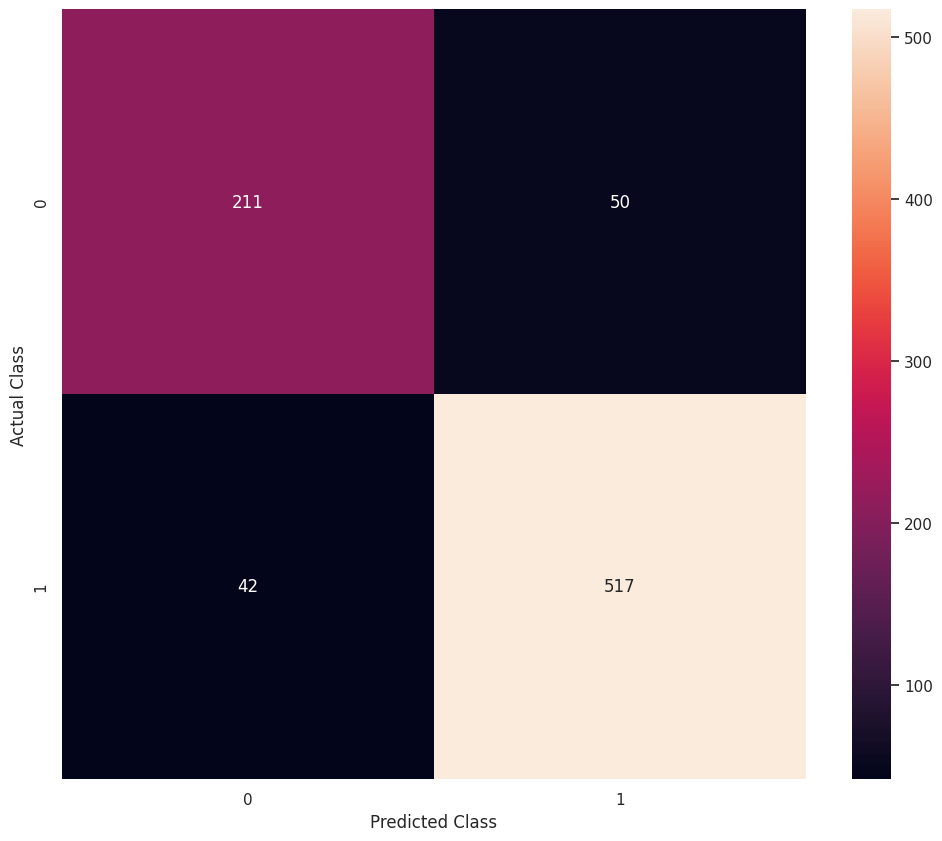

In [ ]:
# replace with code to produce confusion matrix

y_pred = cross_val_predict(model_2, x_train, y_train, cv = cv) # if you haven't already done so, create y_pred object
conf = confusion_matrix(y_train, y_pred) # generate confusion matrix on y_train against y_pred

sns.heatmap(conf, annot=True, fmt='g') # display confusion matrix as a heatmap
sns.set(rc={'figure.figsize':(12,10)})
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

**Results Interpretation for ALL of the results in 4B:**

Precision for Positive Class: 91.2
Recall for Positive Class: 92.5
Precision for Negative Class: 83.3
Recall for Negative Class: 80.8
Accuracy: 89.0

The model has high accuracy and performs well on the positive class which is determing if an evaluation will be low. It does far better than the niave forecast which would be a toin coss of 50/50. SO far on our training set this would be a useful model and would provide better information than a random guess.

## **C**

**Create at least one visualization with a caption or description about how this visualization contributes towards a *meaningful* interpretation of the manager performance data. Draw from the visualization portion of this course, and create your own relevant visualization, label it, and include a brief caption.**

**You may choose to focus on only one or two variables (i.e., it does not need to include all IVs). Imagine you're presenting this analysis to your supervisor or another stakeholder. Create a visualization you would use to illustrate a trend you noted in the Part 4 analysis.**

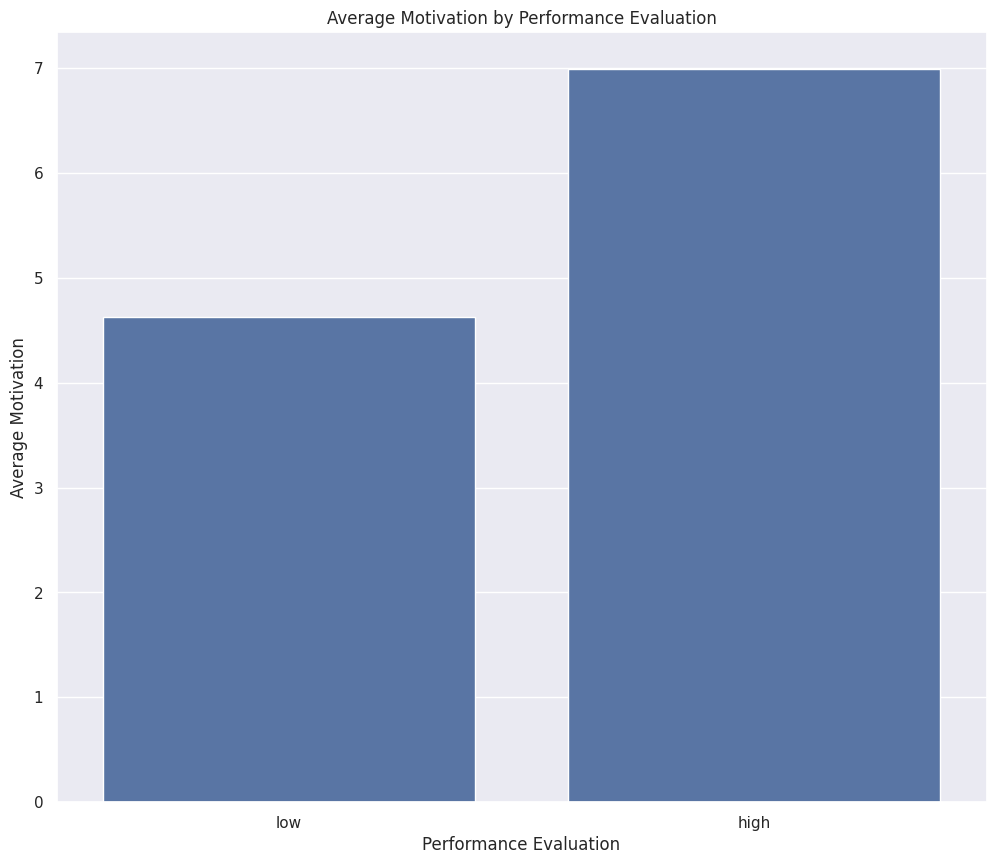

In [ ]:
# replace with code to produce plot -- see Module 3 ICE or cheat sheet for how to produce visualizations

df_2['Performance_Evaluation'] = pd.Categorical(df_2['Performance_Evaluation'], categories=['low', 'high'])

# Calculate mean motivation for each performance evaluation group
mean_motivation = df_2.groupby('Performance_Evaluation')['Motivation'].mean().reset_index()

# Create a bar chart
sns.barplot(x='Performance_Evaluation', y='Motivation', data=mean_motivation, order=['low', 'high'])
plt.xlabel("Performance Evaluation")
plt.ylabel("Average Motivation")
plt.title("Average Motivation by Performance Evaluation")
plt.show()

Caption:  Motivation seems to be a determining factor when assessing an indivzuals potential fit for a manger role. Indivizuals who are highly motivated may be great option when trying to find a new manager.

# **Part 5: Evaluation of Models & Business Recommendations (50 points)**

**Compare the results of the two supervised DM technqiues by presenting their scores in a dataframe in the form of a table. The index should be set to indicate the model (e.g., model_1, model_2), and the columns should indicate the evaluation metric (e.g., precision, recall, etc.). You may choose to include all evaluation metrics, or just the ones you deem relevant. Make sure to at least include those that are most critical in determining the best-performing model for this given dataset.**

> **Save each relevant metric score to an object called model_ for each model, e.g. `model_1 = (0.1, 0.3, 0.4, 0.5)`**

**Then combine each model scores into one `models` object, as was completed in the model performance ICE, to produce a comparison table.**

In [ ]:
# replace with code to display comparison of models on evaluation metrics (e.g., precision, recall, f-1, and accuracy)



model_1 = (0.89, 0.92, 0.90, 0.94)
model_2 = (0.89, 0.92, 0.91, 0.92)

models = model_1, model_2

model_compare = pd.DataFrame(data = models,
                        index = ["model_1", "model_2"],
                        columns = [
                                   "test_acc",
                                   "test_f1",
                                   "test_precision",
                                   "test_recall"
                                   ])
model_compare

,test_acc,test_f1,test_precision,test_recall
model_1,0.89,0.92,0.90,0.94
model_2,0.89,0.92,0.91,0.92


## **B**

**Which model performed better and why? Which performance metrics (list their values) were used to determine this and why?**

Model 1, which was the Decision Tree, ran better in terms of recall 0.94 to 0.92. Both models had the same accuracy and f1 score at 0.89 for accuracy and 0.92 for f1 score. We care more about false negatives than false positives because if an indivuzal was predicted to be a bad fit, but they turn out to be a good fit, that would be far more beneficial than if they were predicted to be a good fit and turned out to be a bad fit. So by this logic we will go with the Decision Tree.

## C

**Fit whichever model you chose as the best-performing model to the test-set, then run a classification report. Do the evaluation metrics drop considerably or not? What does this potentially indicate?**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)


In [ ]:
# replace with code to specify model

model_1 = DecisionTreeClassifier(criterion = "log_loss", random_state=100, max_depth=6, min_samples_leaf=4)


# replace with code to fit model to x_train and y_train


model_1.fit(x_train, y_train)


# replace with code to predict onto x_test

predictions2 = model_1.predict(x_test)

# replace with code to print the classification report

print(classification_report(y_test, predictions2))


              precision    recall  f1-score   support

       False       0.70      0.83      0.76        63
        True       0.92      0.85      0.88       142

    accuracy                           0.84       205
   macro avg       0.81      0.84      0.82       205
weighted avg       0.85      0.84      0.84       205



The model performed simirlarly on the testing set. The accuracy went from 0.89 to 0.84, precision went from 0.90 to 0.92, and the f1 score from 0.92 to 0.88, and the recall from 0.94 to 0.85. SO although three of the metrics fid drop this model still performed significantly well on the gtesting set. This indicates the model isn't flawed in terms of overfit or underfit and will be useful for our business probvlem.

## D

**What business recommendations can be made after this analysis? Please write an Executive Summary (1 paragraph) including the following:**



1.   **Note the business problem**

The business problem is to ensure the success of the hiring process and the effectiveness of the new managers. The HR director aims to build a predictive model that can forecast the performance of prospective managers based on their individual performance.

2.   **Briefly describe the steps taken to resolve the business problem**.

a. Business Understanding: A firm was looking to hire new managers. They gave us data that on what factors contribute to high or low performance evaluations based off of current managers. Then our goal was to predict future performance of managers to make informed hiring decisions.

b. Data Understanding: We explored the manager_performance dataset to grasp the characteristics that included Teamwork, Motivation, Leadership, Number of Previous Positions, and Time Employed.  

c. Data Preparation: Clean the data, which included handling missing values, removing irrelevant features like Manager_ID, First_Name, and Last_Name, and converting categorical data into a suitable numerical format for modeling. This also included removing anything that may potentially may bias decisions such as age, last name, first name.

d. Modeling: We tested out different types of models from clustering analysis, to logistic regression, and decsion trees. We developed predictive models using classification algorithms. We split the data into training and testing sets, train the models on the training set, and tune the hyperparameters to improve prediction accuracy.

e. Evaluation: We evaluated the models using metrics such as accuracy, precision, recall, and F1 score. We decided that false negatives were our immediete concern and chose the model with the highest recall.

f. Deployment: Our models can be useful for deployement the for scoring potential new managers. This system should be easy for the HR director to use when assessing new candidates. Each step involves close communication with stakeholders to ensure the model aligns with the quality of the canidates.


3.   **Indicate your level of confidence that your best-performing model will generalize to new data on managers performance**

We are 84% confident that this model will predict managers' performance correctly, whether they perform with a “high” or “low” rating based on the following metrics: motivation, leadership, teamwork, time employed, and number of previous positions.

4.   **Briefly describe your business recommendations; what might be some important characteristics (based on our IVs) for consider when hiring new managers?**

In terms of our business recommendations we feel that motivation and leadership should be strongly considered when evaluating managers’ performance. According to our logistic regression, positive demonstration of motivation and leadership both have strong correlations to a high performance evaluation.


be detailed
